# Table of contents
1. [Classification](#introduction)
2. [Machine Learning Classification models](#listofmodels)
    1. [Logistic Regression](#LogisticRegression)
    2. [K-Nearest Neighbors (K-NN)](#KNN)
    3. [Support Vector Machine](#SVM)
    4. [Kernel SVM](#K-SVM)
    5. [Naive Bayes](#NB)
    6. [Decision Tree Classification](#DecisionTreeClassification)
    6. [Random Forest Classification](#RandomForestClassification)
3. [Other](#other)


## Classification <a name="introduction"></a>

Classification is a Machine Learning technique to identify the category of new observations based on training data. Example: 
1. Predict which employees are likely to stay to leave
2. classify emails into important, General, Updates or spam
3. Classify if the image is of Dog or Cat

## Machine Learning Classification models: <a name="listofmodels"></a>

##### Supervised 

### Logistic Regression <a name="LogisticRegression"></a>
Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. [https://www.sciencedirect.com/topics/computer-science/logistic-regression#:~:text=Logistic%20regression%20is%20a%20process,%2Fno%2C%20and%20so%20on.]

<img src="https://www.kdnuggets.com/wp-content/uploads/building-predictive-models-logistic-regression-in-python_01.png">

Logic: Logistic regression curve or sigmoid curve

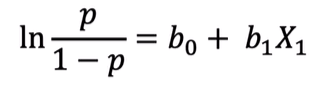

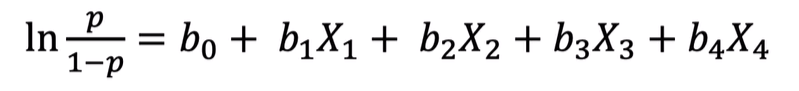

Best fitting cure is derived by Maximising likelihood. Likelihood basically is for all yes observation, multiply YES Probabolity and for all NO observation multiply (1 - No probability) and then multiply both numbers.

### K-Nearest Neighbors (K-NN) <a name="KNN"></a>

##### Supervised 

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/#:~:text=The%20K%2DNearest%20Neighbors%20(KNN)%20algorithm%20is%20a%20popular,have%20similar%20labels%20or%20values.

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

1. Load the data
2. Initialize K to your chosen number of neighbors
3. Calculate the distance between the test record and all the observation from the data. Here there are various methods to measure distance and Euclidean distance is one famous example.
4. Pick the first K smallest entries from the all the distances calculated.
5. Get the labels of the selected K entries
6. Result
    1. If regression, return the mean of the K labels
    2. If classification, return the mode of the K labels

Note, this algorith remebers the entire dataset

### Support Vector Machine (SVM)  <a name="SVM"></a>

### Kernel SVM <a name="K-SVM"></a>

### Naive Bayes <a name="NB"></a>

### Decision Tree Classification <a name="DecisionTreeClassification"></a>

### Random Forest Classification <a name="RandomForestClassification"></a>

## Other <a name="other"></a>